In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA

In [24]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.gaussian_process.kernels import RBF

In [2]:
df_training =  pd.read_csv("training_set_v1_dr7.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [3]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']

In [4]:
# classification as array of 0's and 1's
category = df_training['category']
classification = np.NaN*np.ones(len(category))
classification[category == 'Known galaxies'] = 1  
classification[category == 'Contaminant'] = 0

In [5]:
data = df_training.loc[:,features].values

In [6]:
X,y = data, classification

Counter({0.0: 145, 1.0: 18})


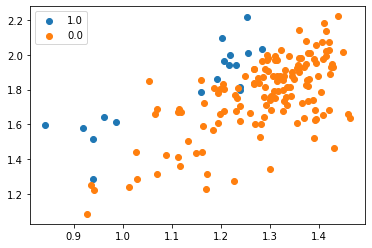

In [7]:
counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0.0: 145, 1.0: 18})
Counter({0.0: 145, 1.0: 116})


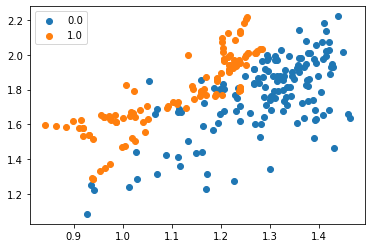

In [8]:
# Oversample with SMOTE and random undersample for imbalanced dataset
X,y = data, classification
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# X,y = over.fit_resample(X,y)
# X,y = under.fit_resample(X,y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [9]:
# dictionary of lists  
dict = {'g-i':X.T[0], 'u-g':X.T[1], 'u-z':X.T[2], 'g-z':X.T[3], 'g-r':X.T[4], 'concentration_index':X.T[5], 'photo_z':X.T[6], 'frac_dev':X.T[7],'axis_ratio':X.T[8],'radius':X.T[9], 'magnitude':X.T[10],'classification':y}
df_training_aug = pd.DataFrame(dict) 

In [10]:
df_training_aug

,g-i,u-g,u-z,g-z,g-r,concentration_index,photo_z,frac_dev,axis_ratio,radius,magnitude,classification
0,1.300867,1.739927,3.280885,1.540958,0.915142,0.422529,0.127905,0.976180,0.528974,63.169183,-14.611520,0.0
1,1.087553,1.425951,2.834935,1.408984,0.703027,0.382775,0.064366,0.755327,0.470933,332.511936,-15.833753,0.0
2,1.281515,1.603737,3.218599,1.614862,0.844437,0.380835,0.093222,1.000000,0.760163,181.161878,-13.807867,0.0
3,1.163971,1.591643,3.022187,1.430544,0.781029,0.354794,0.070580,0.934219,0.871189,124.726262,-13.920716,0.0
4,1.228748,1.767404,3.301172,1.533768,0.843680,0.350446,0.065176,0.964072,0.509374,314.792784,-14.263587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256,1.113776,1.730059,3.084961,1.354902,0.737848,0.441764,0.062513,0.818206,0.999755,22.653897,-12.703315,1.0
257,1.240453,1.808240,3.352431,1.544191,0.841024,0.446127,0.057519,0.709723,0.934642,51.890033,-13.517829,1.0
258,1.240441,1.807183,3.351233,1.544050,0.841917,0.444400,0.058175,0.703345,0.933239,52.465186,-13.464576,1.0
259,1.160491,1.788831,3.254045,1.465215,0.765547,0.357716,0.044485,0.757849,0.882154,313.966290,-16.700036,1.0


In [11]:
plt.rcParams.update({'font.size': 20})

<Figure size 720x576 with 0 Axes>

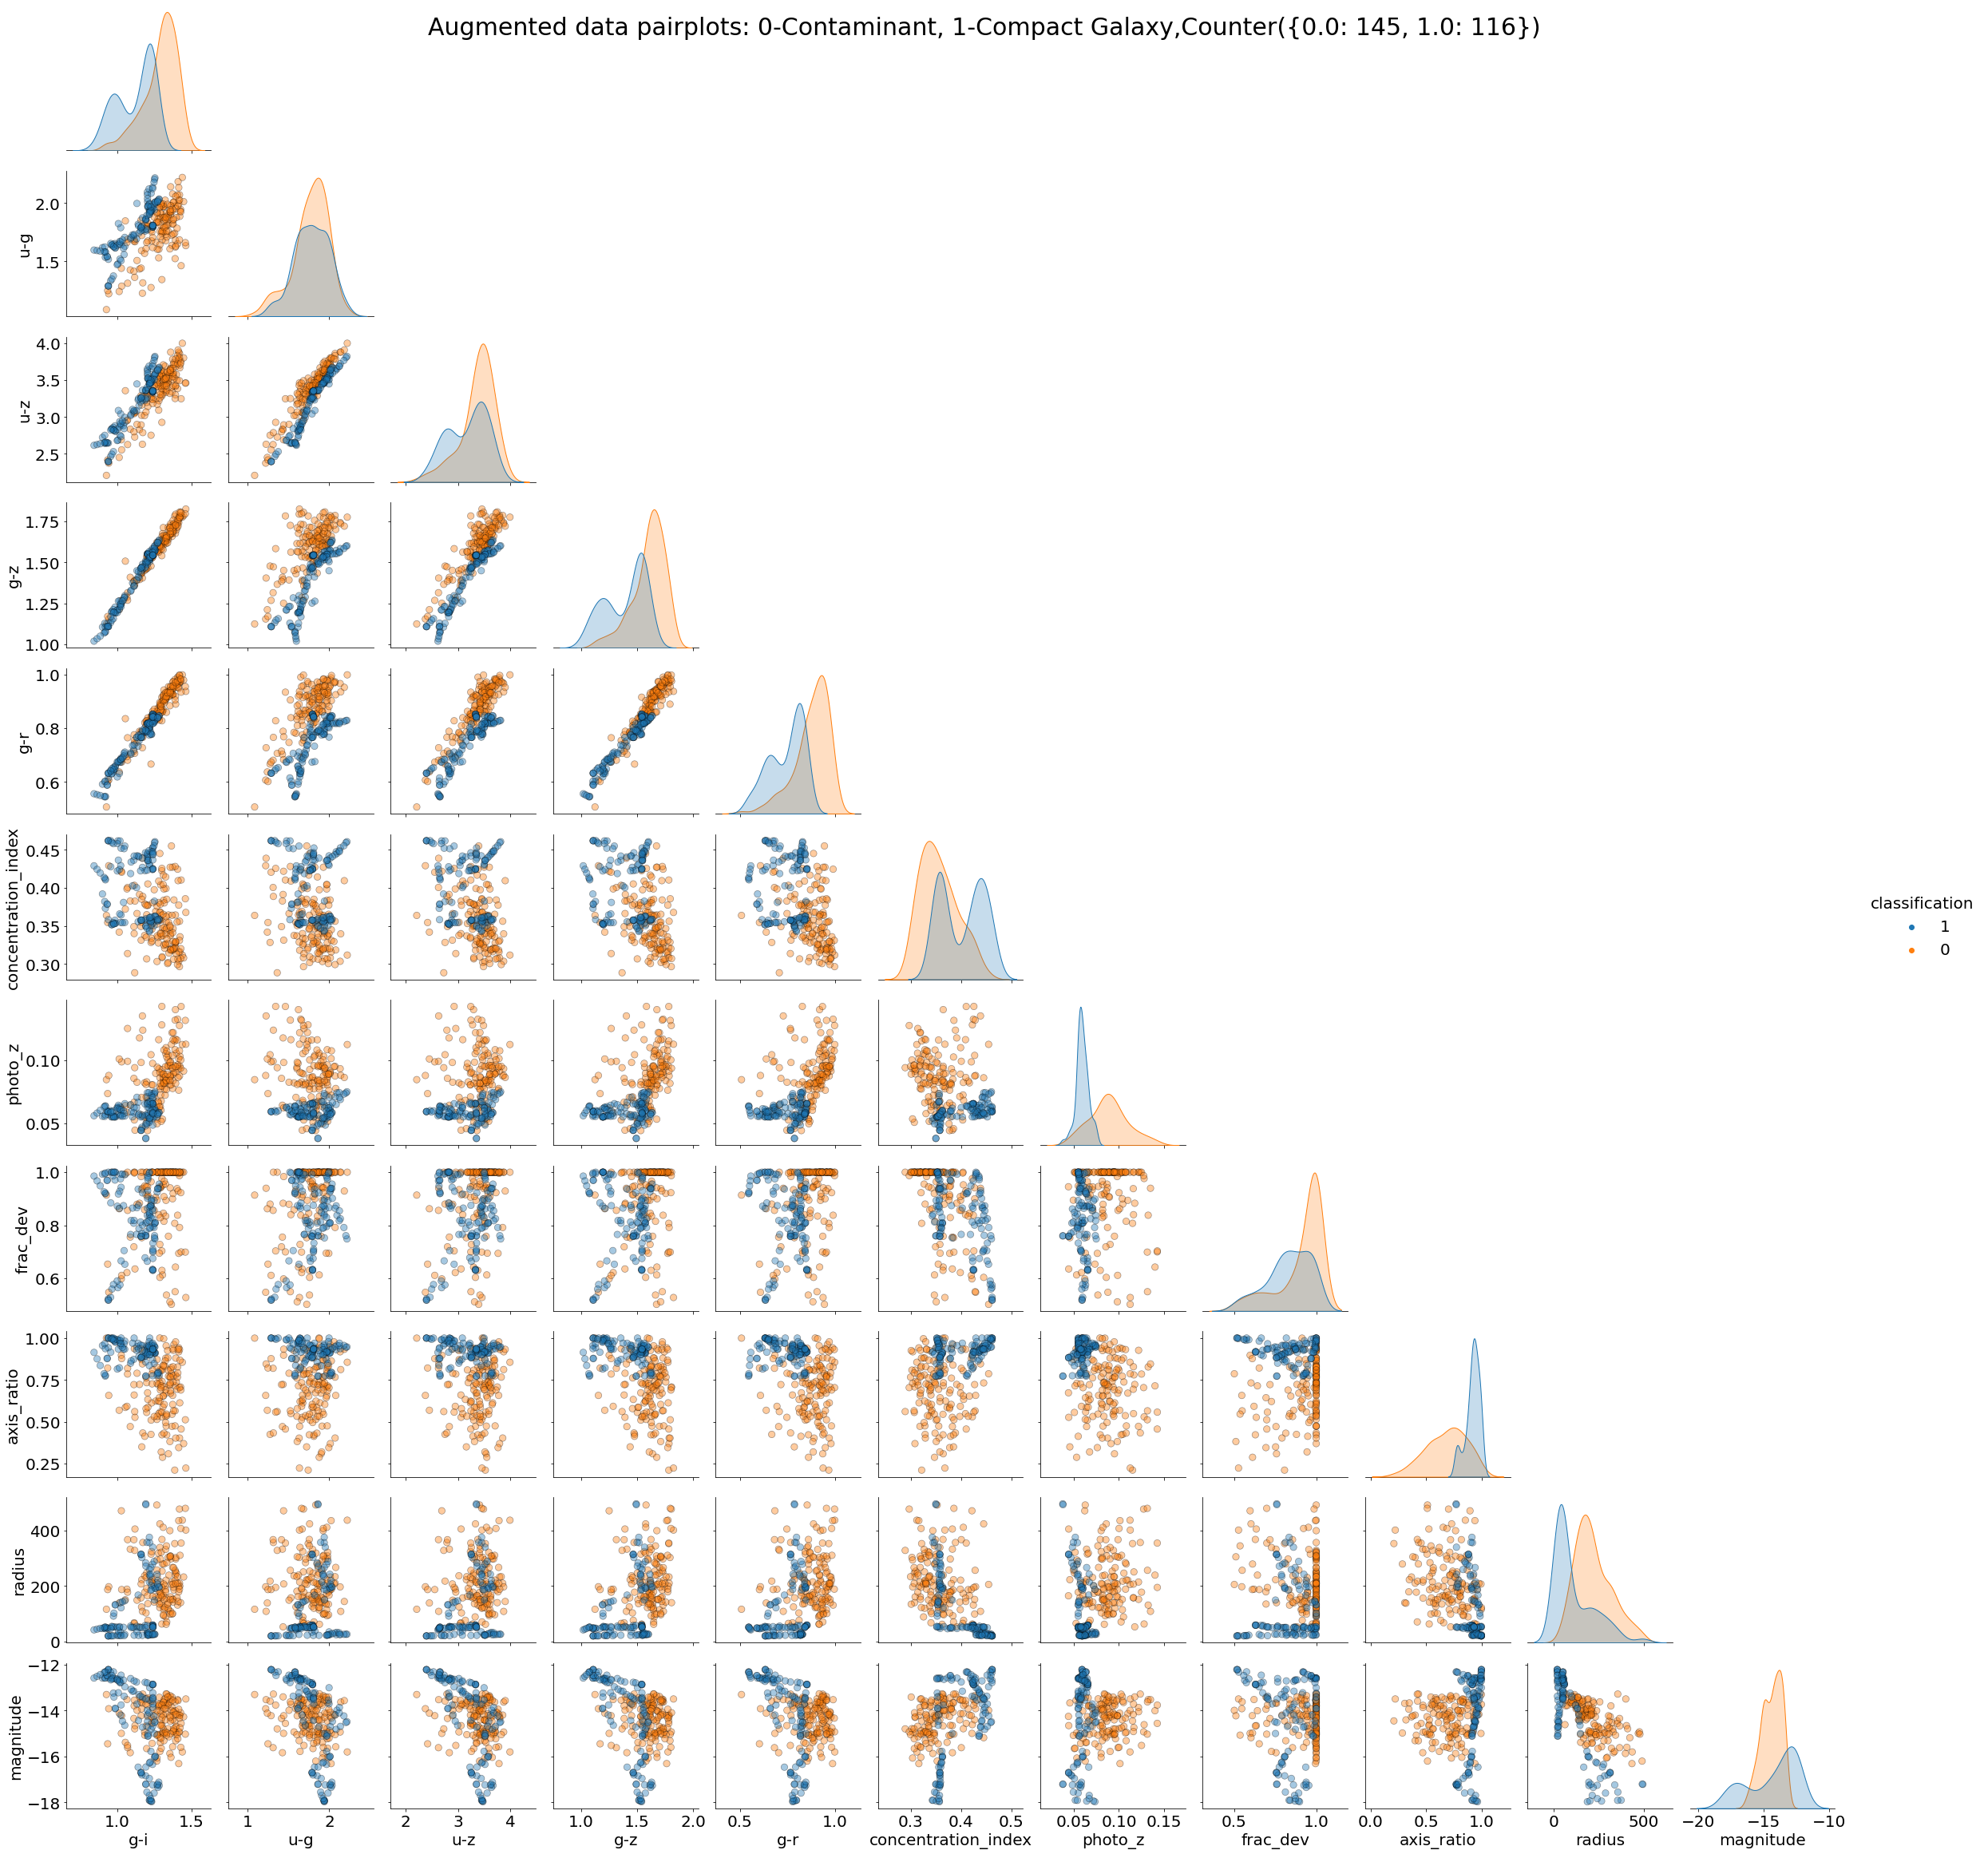

In [13]:
# %matplotlib qt
fig1 = plt.figure(figsize=(10,8))
# sns.set_context("paper", font_scale=2)
# sns.set(font_scale = 1.5)
ax = sns.pairplot(df_training_aug, 
             vars = features,  hue="classification",hue_order = [1,0],
             corner=True,
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 70, 'edgecolor': 'k'},
             height=3);
# Title 
# sns.move_legend(ax, "upper left")
plt.suptitle(f"Augmented data pairplots: 0-Contaminant, 1-Compact Galaxy,{counter}", 
             size = 30);
plt.savefig('data_augmented_pairplot_dr7.png')

In [18]:
# scaler = StandardScaler()
scaler = RobustScaler()
# scaler = QuantileTransformer()
# fit scaler on the training dataset
scaler.fit(X)
# transform the training dataset
data_scaled = scaler.transform(X)
# transform data to 6 principle components which take into account 95 pct of the variance in the data
# pca = PCA(n_components = 11, random_state = 2020)
pca = PCA(n_components = 0.95, random_state = 2020) #this automatically chooses the amount of PC's for 95 pct variance

pca.fit(data_scaled)
principal_components = pca.transform(data_scaled)
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5'])
final_df = pd.concat([principal_df, df_training[['category']]], axis = 1)


In [20]:
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Influence on each principal component by features')

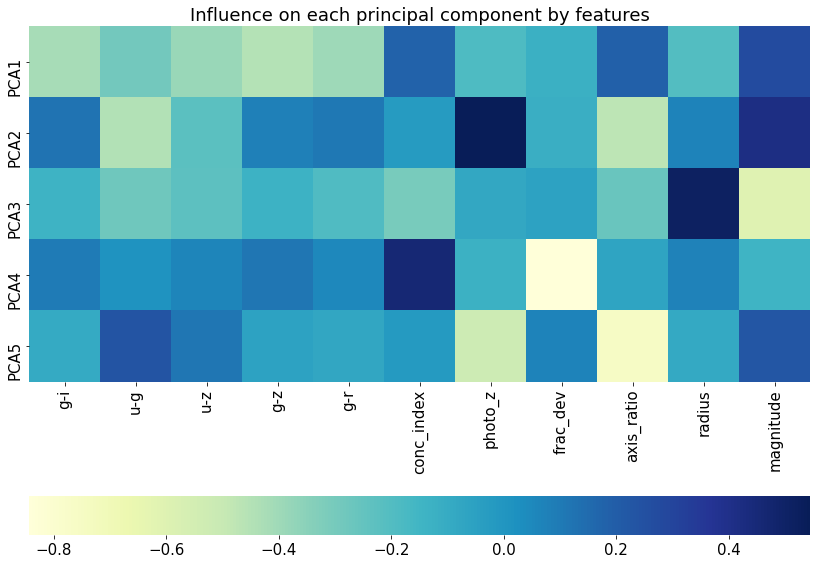

In [21]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'conc_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

In [22]:
X = principal_components

In [28]:
# Spot Check Algorithms
random_state = 2020
models = []
models.append(('LR', LogisticRegression(random_state = 2020,solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state = 2020,gamma='auto')))
models.append(('GP', GaussianProcessClassifier(random_state = 2020)))
models.append(('RF', RandomForestClassifier(random_state = 2020,max_depth=None, n_estimators=100, max_features= 'auto')))
models.append(('MLP', MLPClassifier(random_state = 2020,activation='relu', solver='lbfgs', max_iter=200)))
models.append(('PRCP', Perceptron(random_state = 2020, max_iter=30, tol = 0.001)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=6, random_state=2020, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='balanced_accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# try neural network

LR: 0.979167 (0.017010)
LDA: 0.958611 (0.026903)
KNN: 0.982778 (0.007708)
CART: 0.968056 (0.019642)
NB: 0.948787 (0.040062)
SVM: 0.989583 (0.010417)
GP: 0.986250 (0.009727)
RF: 0.986111 (0.009821)
MLP: 0.988670 (0.017733)
PRCP: 0.964364 (0.043005)


In [29]:
clf = SVC(random_state = 2020,gamma='auto')
clf.fit(X, y)
clf_predict = clf.predict(X)

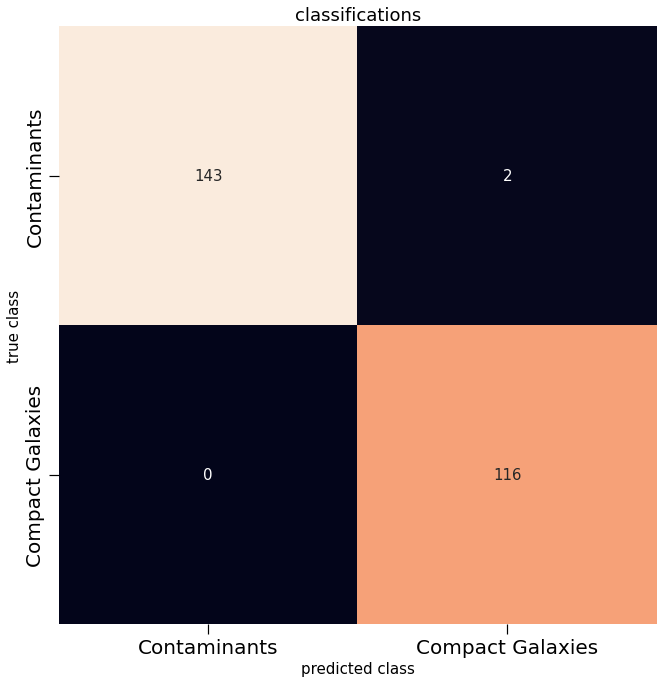

In [30]:
fig1 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y, clf_predict), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Contaminants', 'Compact Galaxies'], yticklabels=['Contaminants', 'Compact Galaxies'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)

In [ ]:
q